In [254]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.backends.backend_pdf import PdfPages
from datetime import date
import seaborn as sns
from datetime import date, timedelta, datetime
import os
import common_functions as cf
from math import ceil
import numpy as np
import matplotlib.dates as mdates
sns.set()

In [255]:
def format_number(value):
    if value >= 1e6:
        return '{:.1f}M'.format(value / 1e6)
    elif value >= 1e3:
        return '{:.0f}K'.format(value / 1e3)
    else:
        return str(value)
    
def format_bar_labels(plot,i):
    label=[]
    try:
        for num in plot.containers[i].datavalues:
            if num != 0 and num != '':
                label.append(format_number(num))
            else:
                label.append('')
        plot.bar_label(plot.containers[i], labels=label, fontsize=6.5)
    except IndexError:
        x = None
    

    return label

In [256]:
downloads_path = "C:\\Users\\Hannah Nevel\\Downloads"

# define file paths and import data as dataframes
investments_filepath = downloads_path + "\\CM Report  Year to Date Investments-2024-02-05-08-18-23.xlsx"
conversions_filepath = downloads_path+ "\\Year to Date Conversions Schedule-2024-02-05-08-18-28.xlsx"
webattendees_filepath = downloads_path +  "\\Webinar Attendees YTD-2024-02-05-08-18-34.xlsx"
webregs_filepath = downloads_path + "\\Manager  New Registrants Created-2024-02-05-08-18-39.xlsx"
matt_phone_filepath = downloads_path + "\\matts(2024-01-01-2024-02-05)-20240205.csv"
devin_phone_filepath = downloads_path + "\\devincs(2024-01-01-2024-02-05)-20240205.csv"
calendly_past_filepath = downloads_path + "\\events-export 2-5-2024.csv"

webattendees_data = pd.read_excel(webattendees_filepath)
yearly_investment_data = pd.read_excel(investments_filepath)
ytd_conversion_list = pd.read_excel(conversions_filepath)
ytd_webregs_data = pd.read_excel(webregs_filepath)
matt_phone_data = pd.read_csv(matt_phone_filepath)
devin_phone_data = pd.read_csv(devin_phone_filepath)
calendly_past = pd.read_csv(calendly_past_filepath)

c:\Users\Hannah Nevel\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\Hannah Nevel\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\Hannah Nevel\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\Hannah Nevel\AppData\Local\Programs\Python\Python311\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no de

In [257]:
#clean and format data
yearly_investment_data['Signature Date'] = pd.to_datetime(yearly_investment_data['Signature Date'])
yearly_investment_data['Investment: Created Date'] = pd.to_datetime(yearly_investment_data['Investment: Created Date'])
yearly_investment_data['Escrow Funds Received'] = pd.to_datetime(yearly_investment_data['Escrow Funds Received'])
yearly_investment_data['Close Date'] = pd.to_datetime(yearly_investment_data['Close Date'])

calendly_past['Start Date & Time'] = pd.to_datetime(calendly_past['Start Date & Time']).dt.date.astype('datetime64')

#separate investment data into respective dataframes
yearly_investment_data_willer = yearly_investment_data[yearly_investment_data['Investment Owner'] == 'Matt Willer']
yearly_investment_data_devin = yearly_investment_data[yearly_investment_data['Investment Owner'] == 'Devin Graves']

yearly_investment_data_willer['Conversion Check'] = yearly_investment_data_willer['Investment Id'].isin(ytd_conversion_list['Conversion Child ID'])
yearly_investment_data_willer = yearly_investment_data_willer[yearly_investment_data_willer['Payment Method'] != 'Existing Investment']
conversions_willer = yearly_investment_data_willer[yearly_investment_data_willer['Conversion Check'] == True]
yearly_investment_data_willer = yearly_investment_data_willer[yearly_investment_data_willer['Conversion Check'] == False]
yearly_investment_data_willer = yearly_investment_data_willer[yearly_investment_data_willer['Stage'] != 'Early Redemption']


yearly_investment_data_devin['Conversion Check'] = yearly_investment_data_devin['Investment Id'].isin(ytd_conversion_list['Conversion Child ID'])
conversions_devin = yearly_investment_data_devin[yearly_investment_data_devin['Conversion Check'] == True]
yearly_investment_data_devin = yearly_investment_data_devin[yearly_investment_data_devin['Conversion Check'] == False]
yearly_investment_data_devin = yearly_investment_data_devin[yearly_investment_data_devin['Payment Method'] != 'Existing Investment']
yearly_investment_data_devin = yearly_investment_data_devin[yearly_investment_data_devin['Stage'] != 'Early Redemption']


rollovers = yearly_investment_data[(yearly_investment_data['Payment Method'] == 'Existing Investment') & \
                                   ((yearly_investment_data['Investment Owner'] == "Matt Willer") | (yearly_investment_data['Investment Owner'] == 'Devin Graves'))]
redemptions = yearly_investment_data[(yearly_investment_data['Stage'] == 'Early Redemption')& (yearly_investment_data['Conversion Child ID'] == '')\
                                      & ((yearly_investment_data['Investment Owner'] == "Matt Willer") | (yearly_investment_data['Investment Owner'] == 'Devin Graves'))]

calendly_devin = calendly_past.loc[calendly_past['User Name'] == 'Devin S Graves']
calendly_matt = calendly_past.loc[calendly_past['User Name'] == 'Matt Willer']

#convert date columns to datetime


# yearly_investment_data_devin['Signature Date'] = pd.to_datetime(yearly_investment_data_devin['Signature Date'])
# yearly_investment_data_devin['Investment: Created Date'] = pd.to_datetime(yearly_investment_data_devin['Investment: Created Date'])
# yearly_investment_data_devin['Escrow Funds Received'] = pd.to_datetime(yearly_investment_data_devin['Escrow Funds Received'])
# yearly_investment_data_devin['Close Date'] = pd.to_datetime(yearly_investment_data_devin['Close Date'])

webattendees_data['Session Date'] = pd.to_datetime(webattendees_data['Session Date'])

webattendees_data = webattendees_data.loc[(webattendees_data['Attended?'] == 'Yes')]
# yearly_newlead_data['Edit Date'] = pd.to_datetime(yearly_newlead_data['Edit Date']).dt.normalize()
ytd_webregs_data['Created Date'] = pd.to_datetime(ytd_webregs_data['Created Date']).dt.normalize()

devin_phone_data['date'] = pd.to_datetime(devin_phone_data['date']).dt.normalize()
matt_phone_data['date'] = pd.to_datetime(matt_phone_data['date']).dt.normalize()

C:\Users\Hannah Nevel\AppData\Local\Temp\ipykernel_10752\3389253018.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_investment_data_willer['Conversion Check'] = yearly_investment_data_willer['Investment Id'].isin(ytd_conversion_list['Conversion Child ID'])
C:\Users\Hannah Nevel\AppData\Local\Temp\ipykernel_10752\3389253018.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yearly_investment_data_devin['Conversion Check'] = yearly_investment_data_devin['Investment Id'].isin(ytd_conversion_list[

In [258]:

current_month = datetime.now().month
current_year = datetime.now().year

# all_created_willer = yearly_investment_data_willer.loc[(yearly_investment_data_willer['Investment: Created Date'].dt.month == current_month) & (yearly_investment_data_willer['Investment: Created Date'].dt.year == current_year)]
all_created_willer = yearly_investment_data_willer.loc[(yearly_investment_data_willer['Investment: Created Date'].dt.year == current_year)]
all_created_willer['week'] = all_created_willer['Investment: Created Date'].dt.to_period('W-Sun')
all_created_devin = yearly_investment_data_devin.loc[(yearly_investment_data_devin['Investment: Created Date'].dt.year == current_year)]
all_created_devin['week'] = all_created_devin['Investment: Created Date'].dt.to_period('W-Sun')

# investments_created = yearly_investment_data_willer.loc[(yearly_investment_data_willer['Investment: Created Date'].dt.month == current_month) & (yearly_investment_data_willer['Stage'] == 'Created')]
# investments_created['week'] = investments_created['Investment: Created Date'].dt.to_period('W-Sun')

# investments_funded_willer = yearly_investment_data_willer.loc[(yearly_investment_data_willer['Escrow Funds Received'].dt.month == current_month) & (yearly_investment_data_willer['Stage'] == 'Funded')]
investments_funded_willer = yearly_investment_data_willer.loc[(yearly_investment_data_willer['Escrow Funds Received'].dt.year == current_year)]                                                                                                                                                 
investments_funded_willer['week'] = investments_funded_willer['Escrow Funds Received'].dt.to_period('W-Sun')
investments_funded_devin = yearly_investment_data_devin.loc[(yearly_investment_data_devin['Escrow Funds Received'].dt.year == current_year)]
investments_funded_devin['week'] = investments_funded_devin['Escrow Funds Received'].dt.to_period('W-Sun')

# investments_settled_willer = yearly_investment_data_willer.loc[(yearly_investment_data_willer['Close Date'].dt.month == current_month) & (yearly_investment_data_willer['Stage'] == 'Settled')]
investments_settled_willer = yearly_investment_data_willer.loc[(yearly_investment_data_willer['Close Date'].dt.year == current_year)]
investments_settled_willer['week'] = investments_settled_willer['Close Date'].dt.to_period('W-Sun')
investments_settled_devin = yearly_investment_data_devin.loc[(yearly_investment_data_devin['Close Date'].dt.year == current_year)]
investments_settled_devin['week'] = investments_settled_devin['Close Date'].dt.to_period('W-Sun')

webregs_created_thismonth = ytd_webregs_data.loc[(ytd_webregs_data['Created Date'].dt.year == current_year)]
webregs_created_thismonth['week'] = webregs_created_thismonth['Created Date'].dt.to_period('W-Sun')
webattendees_thismonth = webattendees_data.loc[(webattendees_data['Session Date'].dt.year == current_year)]
webattendees_thismonth['week'] = webattendees_thismonth['Session Date'].dt.to_period('W-Sun')


matt_phone_data['week'] = matt_phone_data['date'].dt.to_period('W-Sun')
devin_phone_data['week'] = devin_phone_data['date'].dt.to_period('W-Sun')

calendly_devin['week'] = calendly_devin['Start Date & Time'].dt.to_period('W-Sun')
calendly_matt['week'] = calendly_matt['Start Date & Time'].dt.to_period('W-Sun')

C:\Users\Hannah Nevel\AppData\Local\Temp\ipykernel_10752\366463940.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_created_willer['week'] = all_created_willer['Investment: Created Date'].dt.to_period('W-Sun')
C:\Users\Hannah Nevel\AppData\Local\Temp\ipykernel_10752\366463940.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_created_devin['week'] = all_created_devin['Investment: Created Date'].dt.to_period('W-Sun')
C:\Users\Hannah Nevel\AppData\Local\Temp\ipykernel_10752\366463940.py:15: Settin

In [259]:
all_created_willer.tail(5)

,Stage,Account Name,Confirmed Email Addresses,Total Investment,Total Invested,Investment: Created Date,Signature Date,Escrow Funds Received,Close Date,Type,...,Promised Conversion Date,Account ID,Investment Id,Conversion Child ID,Closer,Payment Method,Discounted Bond?,Investment Owner,Conversion Check,week
444,Settled,Chad Thibodaux,chad70754@yahoo.com,100000,100000,2024-01-31,2024-01-31,2024-02-02,2024-02-01,Joint,...,NaN,001Qq000005bcJa,65bae11f8225af060e53b929,NaN,Matt Willer,ACH,False,Matt Willer,False,2024-01-29/2024-02-04
446,Settled,Phil Anglin,phil@anglin.net,72000,152000,2024-02-01,2024-01-31,2024-02-02,2024-02-08,Roth IRA,...,NaN,0014P00004AcDaw,65bbe47c580780eb5cfa732a,NaN,Matt Willer,Wire,False,Matt Willer,False,2024-01-29/2024-02-04
447,Settled,Jerry Gillick,jerrygillick@icloud.com,66000,1468000,2024-02-01,2024-02-01,2024-02-01,2024-02-01,Traditional IRA,...,NaN,0014P000043mR7b,65bbe7b7580780eb5c04b598,NaN,Matt Willer,Wire,True,Matt Willer,False,2024-01-29/2024-02-04
448,Settled,Jeffrey Johnson,janjefjohnson@gmail.com,32000,127000,2024-02-01,2024-01-31,2024-02-01,2024-02-01,Beneficiary Traditional IRA Account,...,NaN,001Qq000005Tc2G,65bbed38cb03aff34b7d9000,NaN,Matt Willer,Wire,True,Matt Willer,False,2024-01-29/2024-02-04
449,Settled,Kandis Glasgow,kandis.sjgroup@gmail.com,25000,175000,2024-02-01,2024-02-01,2024-02-02,2024-02-08,Roth IRA,...,NaN,0014P000043nQnE,65bc0f4a81908f43f66c7ac7,NaN,Matt Willer,Wire,False,Matt Willer,False,2024-01-29/2024-02-04


In [260]:
# investments_settled['Days to Settle'] = abs(investments_settled['Investment: Created Date'] - investments_settled['Close Date'])
# investments_settled['Days to Settle'] = pd.to_numeric(investments_settled['Days to Settle'].dt.days, downcast='integer')
# investments_settled['Existing Investor'] = investments_settled['Total Invested'] != 0
# investments_settled.corr()['Days to Settle'].sort_values()
# chart = sns.boxplot(x='Type',y='Days to Settle', data=investments_settled)
# plt.xticks(rotation=45)
# ticks = chart.get_yticks()
# ylabels = ['$' + '{:,.0f}'.format(x) for x in ticks]
# chart.set_yticklabels(ylabels)
# plt.show()

In [261]:
#day to day data groupings
webattendees_dailycount = webattendees_thismonth.groupby('Session Date')['Attended?'].count().reset_index()
registrants_dailycount = webregs_created_thismonth.groupby('Created Date')['Account ID'].nunique().reset_index()

matt_calendly_dailycount = calendly_matt.groupby('Start Date & Time')['Invitee Email'].nunique().reset_index()
devin_calendly_dailycount = calendly_devin.groupby('Start Date & Time')['Invitee Email'].nunique().reset_index()

matt_phone_data_dailycount = matt_phone_data[['date','inbound_calls','outbound_calls']].copy()
devin_phone_data_dailycount = devin_phone_data[['date','inbound_calls','outbound_calls']].copy()

willer_created_dailycount = all_created_willer.groupby('Investment: Created Date')['Total Investment'].count().reset_index()
willer_funded_dailycount = investments_funded_willer.groupby('Escrow Funds Received')['Total Investment'].count().reset_index()
willer_settled_dailycount = investments_settled_willer.groupby('Close Date')['Total Investment'].count().reset_index()

devin_created_dailycount = all_created_devin.groupby('Investment: Created Date')['Total Investment'].count().reset_index()
devin_funded_dailycount = investments_funded_devin.groupby('Escrow Funds Received')['Total Investment'].count().reset_index()
devin_settled_dailycount = investments_settled_devin.groupby('Close Date')['Total Investment'].count().reset_index()

willer_created_dailysum = all_created_willer.groupby('Investment: Created Date')['Total Investment'].sum().reset_index()
willer_funded_dailysum = investments_funded_willer.groupby('Escrow Funds Received')['Total Investment'].sum().reset_index()
willer_settled_dailysum = investments_settled_willer.groupby('Close Date')['Total Investment'].sum().reset_index()

devin_created_dailysum = all_created_devin.groupby('Investment: Created Date')['Total Investment'].sum().reset_index()
devin_funded_dailysum = investments_funded_devin.groupby('Escrow Funds Received')['Total Investment'].sum().reset_index()
devin_settled_dailysum = investments_settled_devin.groupby('Close Date')['Total Investment'].sum().reset_index()

In [262]:
#week to week data totals groupings
willer_created_weeklysum = all_created_willer.groupby('week')['Total Investment'].sum().reset_index()
willer_created_weeklycount = all_created_willer.groupby('week')['Total Investment'].count().reset_index()

devin_created_weeklysum = all_created_devin.groupby('week')['Total Investment'].sum().reset_index()
devin_created_weeklycount = all_created_devin.groupby('week')['Total Investment'].count().reset_index()

willer_funded_weeklysum = investments_funded_willer.groupby('week')['Total Investment'].sum().reset_index()
willer_funded_weeklycount = investments_funded_willer.groupby('week')['Total Investment'].count().reset_index()

devin_funded_weeklysum = investments_funded_devin.groupby('week')['Total Investment'].sum().reset_index()
devin_funded_weeklycount = investments_funded_devin.groupby('week')['Total Investment'].count().reset_index()

willer_settled_weeklysum = investments_settled_willer.groupby('week')['Total Investment'].sum().reset_index()
willer_settled_weeklycount = investments_settled_willer.groupby('week')['Total Investment'].count().reset_index()

devin_settled_weeklysum = investments_settled_devin.groupby('week')['Total Investment'].sum().reset_index()
devin_settled_weeklycount = investments_settled_devin.groupby('week')['Total Investment'].count().reset_index()

registrants_weeklycount = webregs_created_thismonth.groupby('week')['Account ID'].nunique().reset_index()

webattendees_weeklycount = webattendees_thismonth.groupby('week')['Attended?'].count().reset_index()

matt_phone_data_weeklycount_in = matt_phone_data.groupby('week')['inbound_calls'].sum().reset_index()
matt_phone_data_weeklycount_out = matt_phone_data.groupby('week')['outbound_calls'].sum().reset_index()

matt_phone_data_weeklycount = matt_phone_data_weeklycount_in.merge(matt_phone_data_weeklycount_out, how='outer', on='week')

devin_phone_data_weeklycount_in = devin_phone_data.groupby('week')['inbound_calls'].sum().reset_index()
devin_phone_data_weeklycount_out = devin_phone_data.groupby('week')['outbound_calls'].sum().reset_index()

devin_phone_data_weeklycount = devin_phone_data_weeklycount_in.merge(devin_phone_data_weeklycount_out, how='outer', on='week')

matt_calendly_weeklycount = calendly_matt.groupby('week')['Invitee Email'].nunique().reset_index()
devin_calendly_weeklycount = calendly_devin.groupby('week')['Invitee Email'].nunique().reset_index()

In [263]:
matt_calendly_weeklycount

,week,Invitee Email
0,2024-01-01/2024-01-07,16
1,2024-01-08/2024-01-14,23
2,2024-01-15/2024-01-21,15
3,2024-01-22/2024-01-28,17
4,2024-01-29/2024-02-04,35
5,2024-02-05/2024-02-11,3


In [264]:
def drop_last(df):
    df.drop(df.tail(1).index,inplace=True)
    return df

In [265]:
drop_last(matt_calendly_weeklycount)
drop_last(devin_calendly_weeklycount)
drop_last(devin_phone_data_weeklycount)
drop_last(matt_phone_data_weeklycount)
drop_last(registrants_weeklycount)
# drop_last(willer_created_weeklysum)
# drop_last(willer_created_weeklycount)
drop_last(willer_funded_weeklycount)
drop_last(willer_funded_weeklysum)
drop_last(willer_settled_weeklycount)
drop_last(willer_settled_weeklysum)

# drop_last(devin_created_weeklysum)
# drop_last(devin_created_weeklycount)
# drop_last(devin_funded_weeklycount)
# drop_last(devin_funded_weeklysum)
# drop_last(devin_settled_weeklycount)
# drop_last(devin_settled_weeklysum)

,week,Total Investment
0,2024-01-01/2024-01-07,7116000
1,2024-01-08/2024-01-14,3647000
2,2024-01-15/2024-01-21,6699000
3,2024-01-22/2024-01-28,4206000
4,2024-01-29/2024-02-04,7613000


In [266]:
willer_settled_dailysum.rename(mapper={'Total Investment':'Settled','Close Date':'Date'}, axis=1,inplace=True)
willer_created_dailysum.rename(mapper={'Total Investment':'Created', 'Investment: Created Date':'Date'},axis=1,inplace=True)
willer_funded_dailysum.rename(mapper={'Total Investment':'Funded','Escrow Funds Received':'Date'}, axis=1, inplace=True)

willer_settled_dailycount.rename(mapper={'Total Investment':'Settled Count','Close Date':'Date'}, axis=1,inplace=True)
willer_created_dailycount.rename(mapper={'Total Investment':'Created Count', 'Investment: Created Date':'Date'},axis=1,inplace=True)
willer_funded_dailycount.rename(mapper={'Total Investment':'Funded Count','Escrow Funds Received':'Date'}, axis=1, inplace=True)

devin_settled_dailysum.rename(mapper={'Total Investment':'Settled','Close Date':'Date'}, axis=1,inplace=True)
devin_created_dailysum.rename(mapper={'Total Investment':'Created', 'Investment: Created Date':'Date'},axis=1,inplace=True)
devin_funded_dailysum.rename(mapper={'Total Investment':'Funded','Escrow Funds Received':'Date'}, axis=1, inplace=True)

devin_settled_dailycount.rename(mapper={'Total Investment':'Settled Count','Close Date':'Date'}, axis=1,inplace=True)
devin_created_dailycount.rename(mapper={'Total Investment':'Created Count', 'Investment: Created Date':'Date'},axis=1,inplace=True)
devin_funded_dailycount.rename(mapper={'Total Investment':'Funded Count','Escrow Funds Received':'Date'}, axis=1, inplace=True)

willer_settled_weeklysum.rename(mapper={'Total Investment':'Settled'}, axis=1,inplace=True)
willer_created_weeklysum.rename(mapper={'Total Investment':'Created'},axis=1,inplace=True)
willer_funded_weeklysum.rename(mapper={'Total Investment':'Funded'}, axis=1, inplace=True)

willer_settled_weeklycount.rename(mapper={'Total Investment':'Settled Count'}, axis=1,inplace=True)
willer_created_weeklycount.rename(mapper={'Total Investment':'Created Count'},axis=1,inplace=True)
willer_funded_weeklycount.rename(mapper={'Total Investment':'Funded Count'}, axis=1, inplace=True)

devin_settled_weeklysum.rename(mapper={'Total Investment':'Settled'}, axis=1,inplace=True)
devin_created_weeklysum.rename(mapper={'Total Investment':'Created'},axis=1,inplace=True)
devin_funded_weeklysum.rename(mapper={'Total Investment':'Funded'}, axis=1, inplace=True)

devin_settled_weeklycount.rename(mapper={'Total Investment':'Settled Count'}, axis=1,inplace=True)
devin_created_weeklycount.rename(mapper={'Total Investment':'Created Count'},axis=1,inplace=True)
devin_funded_weeklycount.rename(mapper={'Total Investment':'Funded Count'}, axis=1, inplace=True)

webattendees_dailycount.rename(mapper={'Attended?':'Daily Web Attendees','Session Date':'Date'}, axis=1, inplace=True)
webattendees_weeklycount.rename(mapper={'Attended?':'Weekly Web Attendees'}, axis=1, inplace=True)
registrants_dailycount.rename(mapper={'Account ID':'Daily Web Registrants','Created Date':'Date'},axis=1,inplace=True)
registrants_weeklycount.rename(mapper={'Account ID':'Weekly Web Registrants'},axis=1,inplace=True)

matt_phone_data_dailycount.rename(mapper={'date':'Date'}, axis=1, inplace=True)
devin_phone_data_dailycount.rename(mapper={'date':'Date'}, axis=1, inplace=True)

matt_calendly_dailycount.rename(mapper={'Start Date & Time':'Date'}, axis=1, inplace=True)
devin_calendly_dailycount.rename(mapper={'Start Date & Time':'Date'}, axis=1, inplace=True)

In [267]:
devin_activity_data_daily = webattendees_dailycount.merge(registrants_dailycount, how='outer', on='Date').merge(devin_phone_data_dailycount, how='outer', on='Date').merge(devin_calendly_dailycount, how='outer',on='Date').fillna(0)
matt_activity_data_daily = webattendees_dailycount.merge(registrants_dailycount, how='outer', on='Date').merge(matt_phone_data_dailycount, how='outer', on='Date').merge(matt_calendly_dailycount, how='outer',on='Date').fillna(0)
devin_activity_data_weekly = webattendees_weeklycount.merge(registrants_weeklycount,how='outer', on='week').merge(devin_phone_data_weeklycount, how='outer', on='week').merge(devin_calendly_weeklycount, how='outer', on='week').fillna(0)
matt_activity_data_weekly = webattendees_weeklycount.merge(registrants_weeklycount,how='outer', on='week').merge(matt_phone_data_weeklycount, how='outer', on='week').merge(matt_calendly_weeklycount, how='outer', on='week').fillna(0)

In [268]:
#merge dataframes for graphing
willer_weekly_sums = willer_created_weeklysum.merge(willer_funded_weeklysum,how='outer', on='week').merge(willer_settled_weeklysum,how='outer', on='week').fillna(0)
willer_weekly_counts = willer_created_weeklycount.merge(willer_funded_weeklycount,how='outer', on='week').merge(willer_settled_weeklycount,how='outer', on='week').fillna(0)

devin_weekly_sums = devin_created_weeklysum.merge(devin_funded_weeklysum,how='outer', on='week').merge(devin_settled_weeklysum,how='outer', on='week').fillna(0)
devin_weekly_counts = devin_created_weeklycount.merge(devin_funded_weeklycount,how='outer', on='week').merge(devin_settled_weeklycount,how='outer', on='week').fillna(0)

willer_daily_sums = willer_created_dailysum.merge(willer_funded_dailysum,  how='outer', on='Date').merge(willer_settled_dailysum, how='outer', on='Date').fillna(0)
willer_daily_counts = willer_created_dailycount.merge(willer_funded_dailycount, how='outer', on='Date').merge(willer_settled_dailycount, how='outer', on='Date').fillna(0)

devin_daily_sums = devin_created_dailysum.merge(devin_funded_dailysum, how='outer', on='Date').merge(devin_settled_dailysum, how='outer', on='Date').fillna(0)
devin_daily_counts = devin_created_dailycount.merge(devin_funded_dailycount, how='outer', on='Date').merge(devin_settled_dailycount, how='outer', on='Date').fillna(0)

In [285]:
conversions_devin_grouped = conversions_devin.groupby(['Investment Owner','Stage']).agg({'Total Investment': 'sum'}).unstack('Stage').fillna(0)
conversions_willer_grouped = conversions_willer.groupby(['Investment Owner','Stage']).agg({'Total Investment': 'sum'}).unstack('Stage').fillna(0)
# redemptions_grouped = redemptions.groupby(['Investment Owner','Stage']).agg({'Total Investment': 'sum'}).unstack('Stage').fillna(0)
rollovers_grouped = rollovers.groupby(['Investment Owner','Stage']).agg({'Total Investment': 'sum'}).unstack('Stage').fillna(0)
rollovers_conversions_redemps = conversions_devin_grouped.merge(conversions_willer_grouped, on='Investment Owner', how='outer').merge(rollovers_grouped, on='Investment Owner', how='outer').fillna(0)
rollovers_conversions_redemps.rename(mapper={'Total Investment_x':'Conversions','Total Investment_y':'Rollovers'}, inplace=True, axis=1)

In [286]:
rollovers_conversions_redemps

Conversions           Rollovers                          
Stage                Created   Settled   Created Early Redemption  Settled
Investment Owner                                                          
Matt Willer            30000  10410000   1138000           106000  1353000

In [270]:
colors=['#E24A33','#348ABD','#8EBA42']

lastweek = date.today() - timedelta(days=7)
month_first_day = lastweek.replace(day=1)
date_today = date.today()
dates = pd.date_range(start=month_first_day, end=date_today, freq='D')
vals = [0]*dates.shape[0]
date_frame = {'Date':dates,'vals':vals}
empty_dates_df = pd.DataFrame(data=date_frame)

In [271]:
devin_daily_counts = empty_dates_df.merge(devin_daily_counts, how='outer', on='Date').fillna(0)
devin_daily_sums = empty_dates_df.merge(devin_daily_sums, how='outer', on='Date').fillna(0)
# devin_daily_counts.drop(labels='vals', axis=1, inplace =True)

In [272]:

# devin_daily_sums.set_index(['Date'], inplace=True)
# devin_daily_counts.drop(labels=['vals','vals_x','vals_y'], axis=1, inplace =True)
willer_daily_sums

,Date,Created,Funded,Settled
0,2024-01-01,210000.0,0.0,0.0
1,2024-01-02,221000.0,1684000.0,0.0
2,2024-01-03,593000.0,3232000.0,0.0
3,2024-01-04,1134000.0,396000.0,7116000.0
4,2024-01-05,624000.0,110000.0,0.0
5,2024-01-06,100000.0,0.0,0.0
6,2024-01-07,100000.0,0.0,0.0
7,2024-01-08,1378000.0,0.0,0.0
8,2024-01-09,1919000.0,853000.0,0.0
9,2024-01-10,305000.0,2133000.0,0.0


C:\Users\Hannah Nevel\AppData\Local\Temp\ipykernel_10752\3906630393.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set(yticklabels=new_labels00)
C:\Users\Hannah Nevel\AppData\Local\Temp\ipykernel_10752\3906630393.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set(yticklabels=new_labels01)


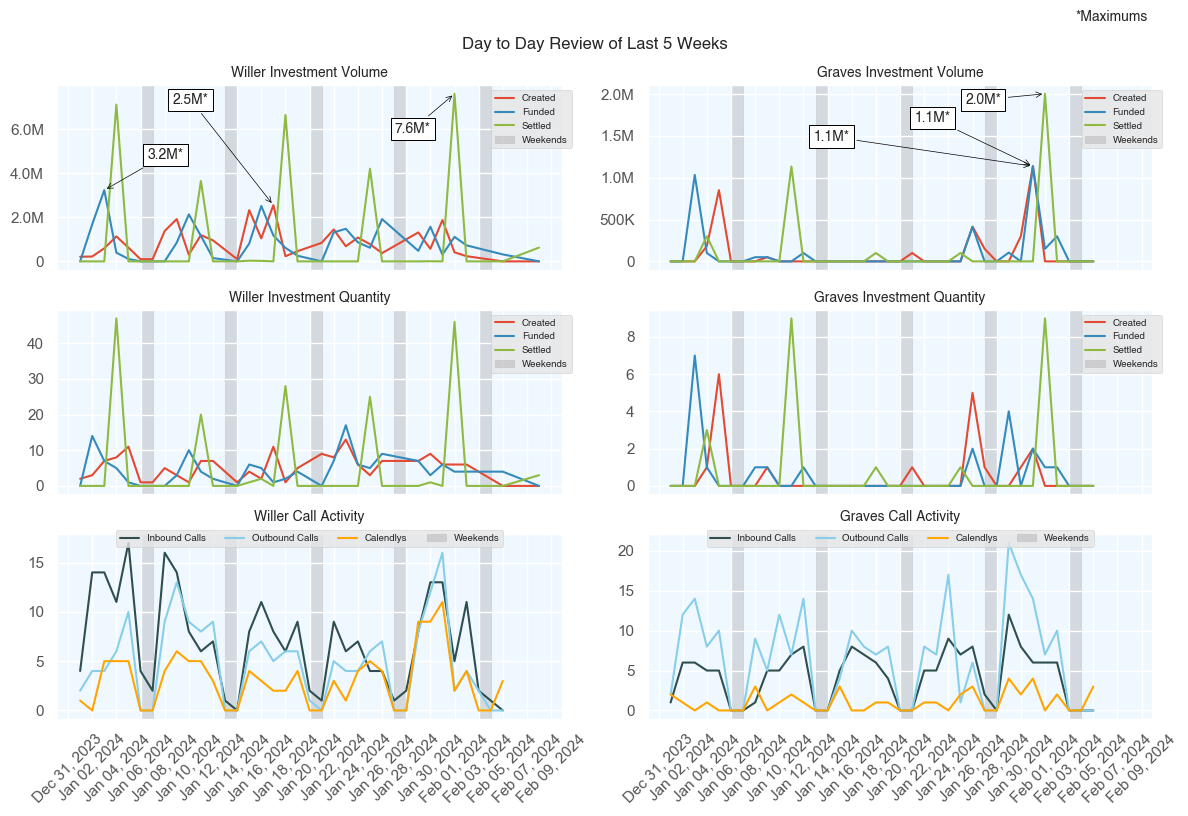

In [273]:
todays_date = date.today().strftime('%b %d, %Y')
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(3,2,sharex=True, figsize=(12, 8), sharey=False)
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["axes.labelweight"] = "bold"
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Helvetica'
    plt.suptitle('Day to Day Review of Last 5 Weeks')

    ax[0,0].set_title('Willer Investment Volume', loc='center', fontsize='large', font='Helvetica')
    ax[0,1].set_title('Graves Investment Volume', loc='center', fontsize='large', font='Helvetica')
    ax[1,0].set_title('Willer Investment Quantity', loc='center', fontsize='large', font='Helvetica')
    ax[1,1].set_title('Graves Investment Quantity', loc='center', fontsize='large', font='Helvetica')
    ax[2,0].set_title('Willer Call Activity', loc='center', pad=10, fontsize='large', font='Helvetica')
    ax[2,1].set_title('Graves Call Activity', loc='center', pad=10,fontsize='large', font='Helvetica')
    # ax[1,0].set_title('Willer Investment Counts', loc='center', pad=24, fontsize='medium')
    # ax[1,1].set_title('Graves Investment Counts', loc='center', pad=24, fontsize='medium')

    ax[0,0].plot(willer_daily_sums['Date'],willer_daily_sums['Created'], color=colors[0])
    ax[0,0].plot(willer_daily_sums['Date'],willer_daily_sums['Funded'], color=colors[1])
    ax[0,0].plot(willer_daily_sums['Date'],willer_daily_sums['Settled'], color=colors[2])

    ax[0,1].plot(devin_daily_sums['Date'],devin_daily_sums['Created'], color=colors[0])
    ax[0,1].plot(devin_daily_sums['Date'],devin_daily_sums['Funded'], color=colors[1])
    ax[0,1].plot(devin_daily_sums['Date'],devin_daily_sums['Settled'], color=colors[2])


    ax[1,0].plot(willer_daily_counts['Date'],willer_daily_counts['Created Count'], color=colors[0])
    ax[1,0].plot(willer_daily_counts['Date'],willer_daily_counts['Funded Count'], color=colors[1])
    ax[1,0].plot(willer_daily_counts['Date'],willer_daily_counts['Settled Count'], color=colors[2])

    ax[1,1].plot(devin_daily_counts['Date'],devin_daily_counts['Created Count'], color=colors[0])
    ax[1,1].plot(devin_daily_counts['Date'],devin_daily_counts['Funded Count'], color=colors[1])
    ax[1,1].plot(devin_daily_counts['Date'],devin_daily_counts['Settled Count'], color=colors[2])
    # devin_daily_counts.plot.bar(x='Date', y=['Created Count','Funded Count','Settled Count'], ax=ax[1,1])

    # ax[2,0].plot(matt_activity_data_daily['Date'], matt_activity_data_daily['Daily Web Attendees'])
    # ax[2,0].plot(matt_activity_data_daily['Date'], matt_activity_data_daily['Daily Web Registrants'])
    ax[2,0].plot(matt_activity_data_daily['Date'], matt_activity_data_daily['inbound_calls'], color='darkslategrey')
    ax[2,0].plot(matt_activity_data_daily['Date'], matt_activity_data_daily['outbound_calls'], color='skyblue')
    ax[2,0].plot(matt_activity_data_daily['Date'], matt_activity_data_daily['Invitee Email'], color='orange')

    # ax[2,1].plot(devin_activity_data_daily['Date'], devin_activity_data_daily['Daily Web Attendees'])
    # ax[2,1].plot(devin_activity_data_daily['Date'], devin_activity_data_daily['Daily Web Registrants'])
    ax[2,1].plot(devin_activity_data_daily['Date'], devin_activity_data_daily['inbound_calls'], color='darkslategrey')
    ax[2,1].plot(devin_activity_data_daily['Date'], devin_activity_data_daily['outbound_calls'], color='skyblue')
    ax[2,1].plot(devin_activity_data_daily['Date'], devin_activity_data_daily['Invitee Email'], color='Orange')
    

    ticks_00 = ax[0,0].get_yticks()
    new_labels00 = [format_number(int(x)) for x in ticks_00]
    ax[0,0].set(yticklabels=new_labels00) 

    ticks_01 = ax[0,1].get_yticks()
    new_labels01 = [format_number(int(x)) for x in ticks_01]
    ax[0,1].set(yticklabels=new_labels01)
    
    for i in range(0,3):
        ax[i,1].axvspan(datetime(2024,1,6), datetime(2024,1,7), color='grey', alpha=0.25, zorder=0, label='weekends')
        ax[i,1].axvspan(datetime(2024,1,13), datetime(2024,1,14), color='grey', alpha=0.25, zorder=0)
        ax[i,1].axvspan(datetime(2024,1,20), datetime(2024,1,21), color='grey', alpha=0.25, zorder=0)
        ax[i,1].axvspan(datetime(2024,1,27), datetime(2024,1,28), color='grey', alpha=0.25, zorder=0)
        ax[i,1].axvspan(datetime(2024,2,3), datetime(2024,2,4), color='grey', alpha=0.25, zorder=0)

    for i in range(0,3):
        ax[i,0].axvspan(datetime(2024,1,6), datetime(2024,1,7), color='grey', alpha=0.25, zorder=0, label='weekends')
        ax[i,0].axvspan(datetime(2024,1,13), datetime(2024,1,14), color='grey', alpha=0.25, zorder=0)
        ax[i,0].axvspan(datetime(2024,1,20), datetime(2024,1,21), color='grey', alpha=0.25, zorder=0)
        ax[i,0].axvspan(datetime(2024,1,27), datetime(2024,1,28), color='grey', alpha=0.25, zorder=0)
        ax[i,0].axvspan(datetime(2024,2,3), datetime(2024,2,4), color='grey', alpha=0.25, zorder=0)

    ax[0,0].legend(['Created','Funded','Settled','Weekends'],ncols=1, fontsize='x-small',loc='upper left', bbox_to_anchor=(.85, 1))
    ax[1,0].legend(['Created','Funded','Settled','Weekends'], ncols=1, fontsize='x-small',loc='upper left', bbox_to_anchor=(.85, 1))
    ax[2,0].legend(['Inbound Calls','Outbound Calls','Calendlys','Weekends'], ncols=4, fontsize='x-small',loc='upper center', bbox_to_anchor=(.5, 1.05))

    ax[0,1].legend(['Created','Funded','Settled','Weekends'], ncols=1, fontsize='x-small',loc='upper left', bbox_to_anchor=(.85, 1))
    ax[1,1].legend(['Created','Funded','Settled','Weekends'], ncols=1, fontsize='x-small',loc='upper left', bbox_to_anchor=(.85, 1))
    ax[2,1].legend(['Inbound Calls','Outbound Calls','Calendlys','Weekends'], ncols=4, fontsize='x-small',loc='upper center', bbox_to_anchor=(.5, 1.05))
    # sns.move_legend(ax[0], "upper center")
    # sns.move_legend(ax[1], "upper center")
    # sns.move_legend(ax[2], "upper center")
        
    # ax[0].legend(ncols=3, loc='upper center')
    # ax[1].legend(ncols=3, loc='upper center')
    # ax[2].legend(ncols=1, loc='upper right')

    ax[0,0].set_facecolor('aliceblue')
    ax[0,1].set_facecolor('aliceblue')
    ax[1,0].set_facecolor('aliceblue')
    ax[1,1].set_facecolor('aliceblue')
    ax[2,0].set_facecolor('aliceblue')
    ax[2,1].set_facecolor('aliceblue')

    ax[2,0].tick_params(axis='x',labelrotation=45)
    ax[2,1].tick_params(axis='x',labelrotation=45)
    ax[2,0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))
    ax[2,1].xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))
    ax[2,1].xaxis.set_major_locator(mdates.DayLocator(interval=2))

    def annot_max(x,y, ax, xytext):
        xmax = x[np.argmax(y)]
        ymax = y.max()
        # text= '{:.1f}M'.format(ymax / 1e6)
        text = format_number(ymax) + '*'
        if not ax:
            ax=plt.gca()
        bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="black", lw=0.72)
        arrowprops=dict(arrowstyle="->",connectionstyle="arc,angleA=0,angleB=90", color='black')
        kw = dict(xycoords='data',textcoords="axes fraction",
                arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
        ax.annotate(text, xy=(xmax, ymax), xytext=xytext, **kw)

    annot_max(willer_daily_sums['Date'],willer_daily_sums['Created'], ax[0,0], (.3,.96))
    annot_max(willer_daily_sums['Date'],willer_daily_sums['Funded'], ax[0,0], (.25,.66))
    annot_max(willer_daily_sums['Date'],willer_daily_sums['Settled'], ax[0,0], (.74,.80))
    
    annot_max(devin_daily_sums['Date'],devin_daily_sums['Created'], ax[0,1], (.6,.86))
    annot_max(devin_daily_sums['Date'],devin_daily_sums['Funded'], ax[0,1], (.4,.76))
    annot_max(devin_daily_sums['Date'],devin_daily_sums['Settled'], ax[0,1], (.7,.96))



    fig.text(.9, 1, '*Maximums', fontsize = 10)

    plt.tight_layout()
    plt.show()

In [274]:
# willer_weekly_counts['week'] = willer_weekly_counts['week'].apply(lambda x: x.start_time).dt.strftime('%b %d, %Y')
willer_weekly_sums['week'] = willer_weekly_sums['week'].apply(lambda x: x.start_time).dt.strftime('%b %d, %Y')
devin_weekly_counts['week'] = devin_weekly_counts['week'].apply(lambda x: x.start_time).dt.strftime('%b %d, %Y')
devin_weekly_sums['week'] = devin_weekly_sums['week'].apply(lambda x: x.start_time).dt.strftime('%b %d, %Y')
devin_activity_data_weekly['week'] = devin_activity_data_weekly['week'].apply(lambda x: x.start_time).dt.strftime('%b %d, %Y')
matt_activity_data_weekly['week'] = matt_activity_data_weekly['week'].apply(lambda x: x.start_time).dt.strftime('%b %d, %Y')

C:\Users\Hannah Nevel\AppData\Local\Temp\ipykernel_10752\3530598417.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set(yticklabels=new_labels00)
C:\Users\Hannah Nevel\AppData\Local\Temp\ipykernel_10752\3530598417.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set(yticklabels=new_labels01)


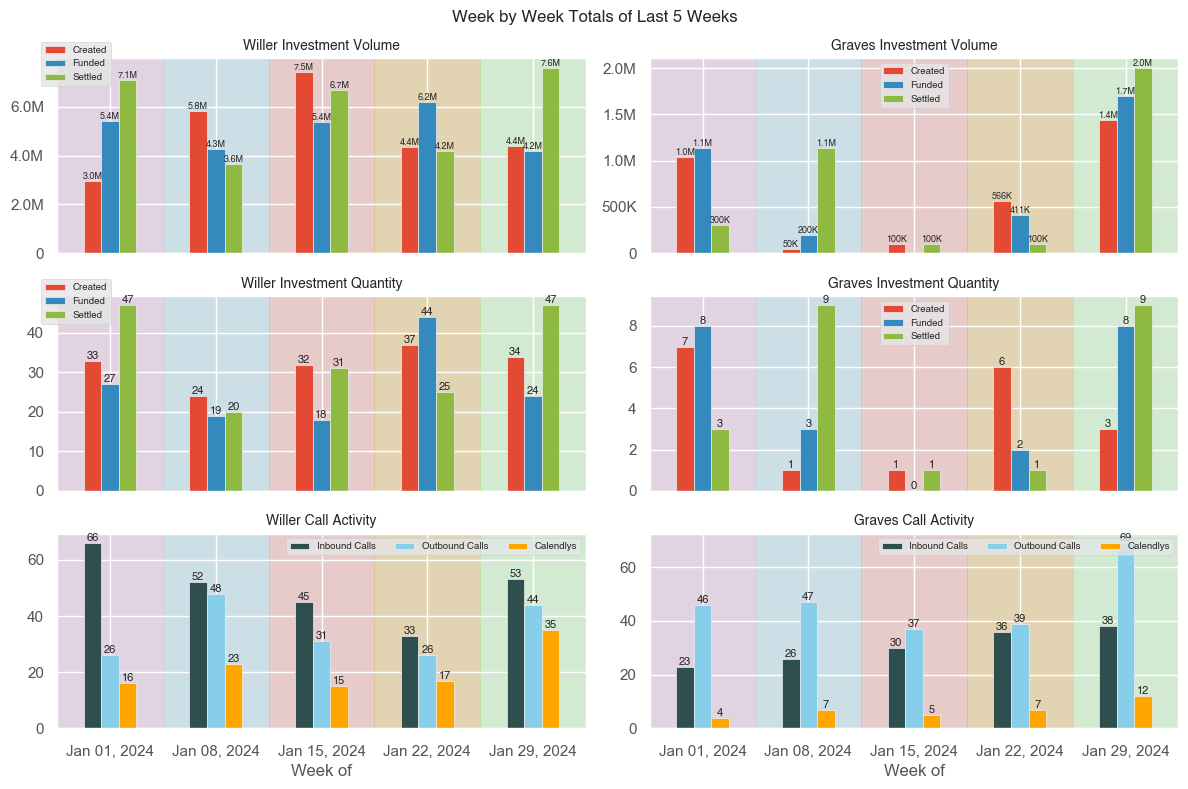

In [275]:
todays_date = date.today().strftime('%b %d, %Y')
with plt.style.context('ggplot'):
    fig2, ax = plt.subplots(3,2,sharex=True, figsize=(12, 8), sharey=False)
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["axes.labelweight"] = "bold"
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Helvetica'
    plt.suptitle('Week by Week Totals of Last 5 Weeks')

    ax[0,0].set_title('Willer Investment Volume', loc='center', fontsize='large', font='Helvetica')
    ax[0,1].set_title('Graves Investment Volume', loc='center', fontsize='large', font='Helvetica')
    ax[1,0].set_title('Willer Investment Quantity', loc='center', fontsize='large', font='Helvetica')
    ax[1,1].set_title('Graves Investment Quantity', loc='center', fontsize='large', font='Helvetica')
    ax[2,0].set_title('Willer Call Activity', loc='center', fontsize='large', font='Helvetica')
    ax[2,1].set_title('Graves Call Activity', loc='center', fontsize='large', font='Helvetica')

    willer_weekly_sums.plot.bar(ax=ax[0,0], color=colors)
    willer_weekly_counts.plot.bar(ax=ax[1,0], color=colors)

    format_bar_labels(ax[0,0],0)
    format_bar_labels(ax[0,0],1)
    format_bar_labels(ax[0,0],2)

    devin_weekly_sums.plot.bar(ax=ax[0,1], color=colors, legend=None)
    devin_weekly_counts.plot.bar(ax=ax[1,1], color=colors, legend=None)

    ax[1,0].bar_label(ax[1,0].containers[0], fontsize=8)
    ax[1,0].bar_label(ax[1,0].containers[1], fontsize=8)
    ax[1,0].bar_label(ax[1,0].containers[2], fontsize=8)
    ax[1,1].bar_label(ax[1,1].containers[0], fontsize=8)
    ax[1,1].bar_label(ax[1,1].containers[1], fontsize=8)
    ax[1,1].bar_label(ax[1,1].containers[2], fontsize=8)

    format_bar_labels(ax[0,1],0)
    format_bar_labels(ax[0,1],1)
    format_bar_labels(ax[0,1],2)

    matt_activity_data_weekly.plot.bar(x='week',y=['inbound_calls','outbound_calls','Invitee Email'],ax=ax[2,0], color=['darkslategrey','skyblue','orange'])

    ax[2,0].bar_label(ax[2,0].containers[0], fontsize=8)
    ax[2,0].bar_label(ax[2,0].containers[1], fontsize=8)
    ax[2,0].bar_label(ax[2,0].containers[2], fontsize=8)

    devin_activity_data_weekly.plot.bar(x='week',y=['inbound_calls','outbound_calls','Invitee Email'],ax=ax[2,1], color=['darkslategrey','skyblue','orange'], legend=None)


    ax[2,1].bar_label(ax[2,1].containers[0], fontsize=8)
    ax[2,1].bar_label(ax[2,1].containers[1], fontsize=8)
    ax[2,1].bar_label(ax[2,1].containers[2], fontsize=8)

    ticks_00 = ax[0,0].get_yticks()
    new_labels00 = [format_number(int(x)) for x in ticks_00]
    ax[0,0].set(yticklabels=new_labels00) 

    ticks_01 = ax[0,1].get_yticks()
    new_labels01 = [format_number(int(x)) for x in ticks_01]
    ax[0,1].set(yticklabels=new_labels01)
    
    ax[0,0].legend(['Created','Funded','Settled'], ncols=1, fontsize='x-small',loc='upper right', bbox_to_anchor=(.11, 1.11))
    ax[1,0].legend(['Created','Funded','Settled'], ncols=1, fontsize='x-small',loc='upper right', bbox_to_anchor=(.11, 1.11))
    ax[2,0].legend(['Inbound Calls','Outbound Calls','Calendlys'], ncols=3, fontsize='x-small',loc='upper right')

    ax[0,1].legend(['Created','Funded','Settled'], ncols=1, fontsize='x-small',loc='upper center')
    ax[1,1].legend(['Created','Funded','Settled'], ncols=1, fontsize='x-small',loc='upper center')
    ax[2,1].legend(['Inbound Calls','Outbound Calls','Calendlys'], ncols=3, fontsize='x-small',loc='upper right')
    # ax[0,1].legend(['Created','Funded','Settled'], ncols=3,bbox_to_anchor=(0, 1), fontsize='small',loc='lower left')
    # ax[1,1].legend(['Created Count','Funded Count','Settled Count'], ncols=3,bbox_to_anchor=(0, 1), fontsize='small',loc='lower left')
    # ax[2,1].legend(['Inbound Calls','Outbound Calls','Calendlys'], ncols=3,bbox_to_anchor=(0, 1), fontsize='small',loc='lower left')

    # ax[0,0].set_facecolor('aliceblue')
    # ax[0,1].set_facecolor('aliceblue')
    # ax[1,0].set_facecolor('whitesmoke')
    # ax[1,1].set_facecolor('whitesmoke')
    # ax[2,0].set_facecolor('ghostwhite')
    # ax[2,1].set_facecolor('ghostwhite')

    ax[2,0].tick_params(axis='x',labelrotation=0, size=8)
    ax[2,1].tick_params(axis='x',labelrotation=0, size=8)

    ax[2,0].set_xlabel('Week of')
    ax[2,1].set_xlabel('Week of')

    for i in range(0,3):
        ax[i,0].axvspan(-1, .5, color='plum', alpha=0.25, zorder=0)
        ax[i,0].axvspan(.5, 1.5, color='skyblue', alpha=0.25, zorder=0)
        ax[i,0].axvspan(1.5, 2.5, color='lightcoral', alpha=0.25, zorder=0)
        ax[i,0].axvspan(2.5, 3.5, color='goldenrod', alpha=0.25, zorder=0)
        ax[i,0].axvspan(3.5, 4.5, color='palegreen', alpha=0.25, zorder=0)
    for i in range(0,3):
        ax[i,1].axvspan(-1, .5, color='plum', alpha=0.25, zorder=0)
        ax[i,1].axvspan(.5, 1.5, color='skyblue', alpha=0.25, zorder=0)
        ax[i,1].axvspan(1.5, 2.5, color='lightcoral', alpha=0.25, zorder=0)
        ax[i,1].axvspan(2.5, 3.5, color='goldenrod', alpha=0.25, zorder=0)
        ax[i,1].axvspan(3.5, 4.5, color='palegreen', alpha=0.25, zorder=0)


    plt.tight_layout()
    plt.show()

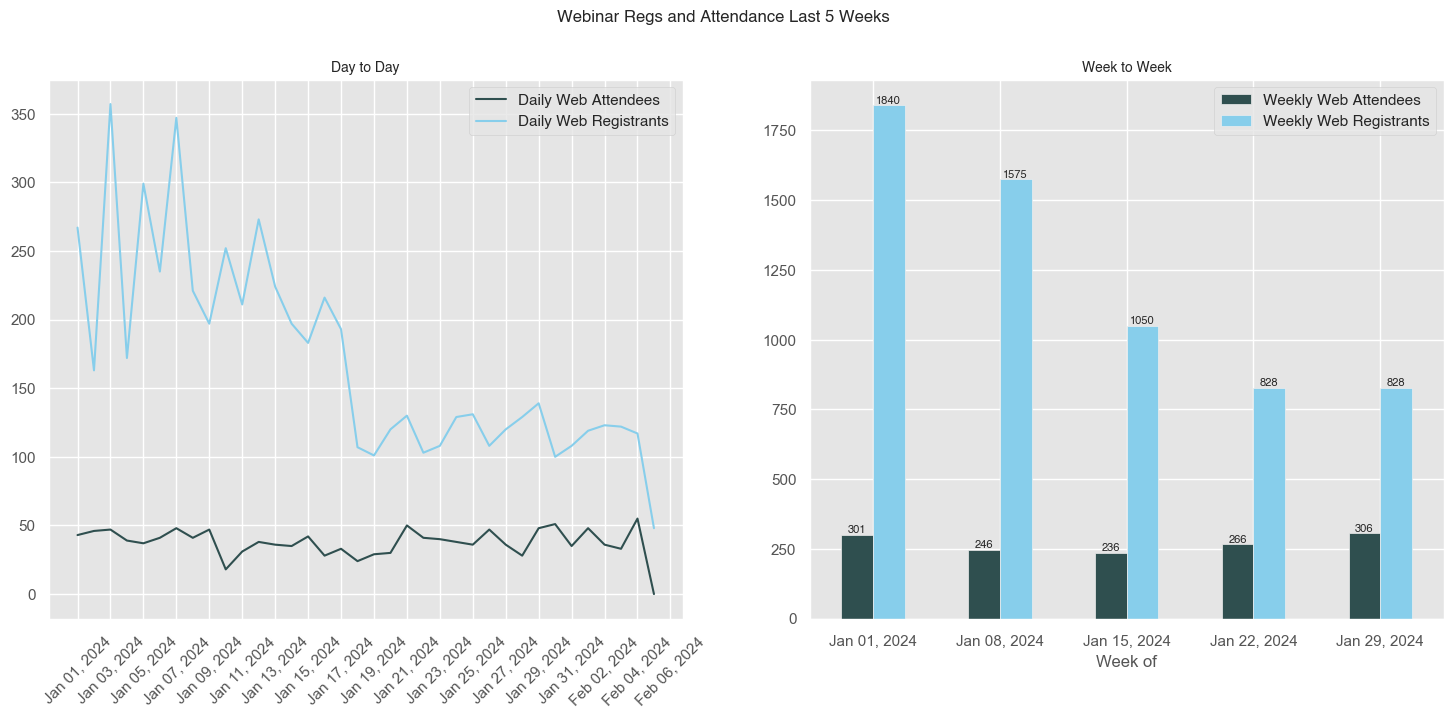

In [276]:
todays_date = date.today().strftime('%b %d, %Y')
with plt.style.context('ggplot'):
    fig3, ax = plt.subplots(1,2,sharex=False, figsize=(18, 7), sharey=False)
    plt.rcParams["font.weight"] = "bold"
    plt.rcParams["axes.labelweight"] = "bold"
    plt.rcParams["axes.edgecolor"] = "black"
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Helvetica'
    plt.suptitle('Webinar Regs and Attendance Last 5 Weeks')

    ax[0].set_title('Day to Day', loc='center', fontsize='large', font='Helvetica')
    ax[1].set_title('Week to Week', loc='center', fontsize='large', font='Helvetica')

    matt_activity_data_weekly.plot.bar(x='week',y=['Weekly Web Attendees','Weekly Web Registrants'],ax=ax[1], color=['darkslategrey','skyblue'])
    ax[0].plot(matt_activity_data_daily['Date'], matt_activity_data_daily['Daily Web Attendees'], color='darkslategrey')
    ax[0].plot(matt_activity_data_daily['Date'], matt_activity_data_daily['Daily Web Registrants'], color='skyblue')
    ax[0].legend(['Daily Web Attendees','Daily Web Registrants'])

    ax[1].bar_label(ax[1].containers[0], fontsize=8)
    ax[1].bar_label(ax[1].containers[1], fontsize=8)

    ax[0].tick_params(axis='x',labelrotation=45, size=8)
    ax[1].tick_params(axis='x',labelrotation=0, size=8)

    ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d, %Y'))
    # ax[0,0].set_xlabel('Da')
    ax[1].set_xlabel('Week of')
    ax[0].xaxis.set_major_locator(mdates.DayLocator(interval=2))
    # plt.tight_layout()
    plt.show()

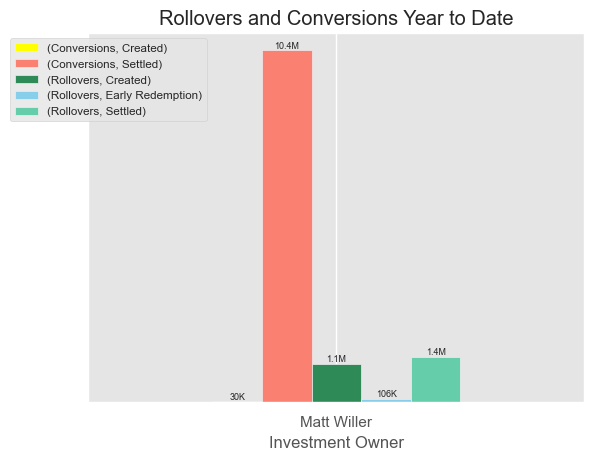

In [295]:
with plt.style.context('ggplot'):   
    fig4, ax = plt.subplots(1) 
    rollovers_conversions_redemps.plot.bar(color=['yellow','salmon','seagreen','skyblue','mediumaquamarine'], ax=ax)
    plt.legend( ncols=1,fontsize='small', bbox_to_anchor=(.25, 1))
    plt.title('Rollovers and Conversions Year to Date')
    plt.yticks([])
    plt.xticks(rotation=0)

    format_bar_labels(ax,0)
    format_bar_labels(ax,1)
    format_bar_labels(ax,2)
    format_bar_labels(ax,3)
    format_bar_labels(ax,4)
    plt.show()

In [187]:
def write_unique_file(output_path):
    
    base,ext = os.path.splitext(output_path)
    count = 0
    if os.path.exists(output_path):

        while os.path.exists(output_path):
                count += 1
                output_path = f'{base}_{count}{ext}'
        # print(output_path)
        return output_path
    else:
        # print(output_path)
        return output_path

In [188]:
base_path = 'C:\\Users\\Hannah Nevel\\Documents\\Weekly Reporting - CM\\Manager Reports - year to date\\2024\\'
todays_date = str(date.today())
folder_path = cf.create_folder(base_path,todays_date)

In [296]:
todays_date = str(date.today())
save_filename = 'CM Managers Report - ' + todays_date + '.pdf'
filepath = folder_path + '\\' +save_filename
unique_filename = cf.write_unique_file(filepath)
with PdfPages(unique_filename) as pdf:
    pdf.savefig(fig2, bbox_inches='tight')
    pdf.savefig(fig, bbox_inches='tight')
    pdf.savefig(fig3, bbox_inches='tight')
    pdf.savefig(fig4, bbox_inches='tight')


